In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 1. Загрузить данные из файла.


In [60]:
df = pd.read_csv('lab1-02.csv', header=None)
df.columns = ['X', 'Y']
df.head()

,X,Y
0,1.323232,1443.073978
1,2.373737,1779.828149
2,8.878788,11710.737921
3,8.555556,10962.941786
4,2.858586,3494.724975


## 2. Визуализировать загруженные данные (диаграмма рассеяния, график).

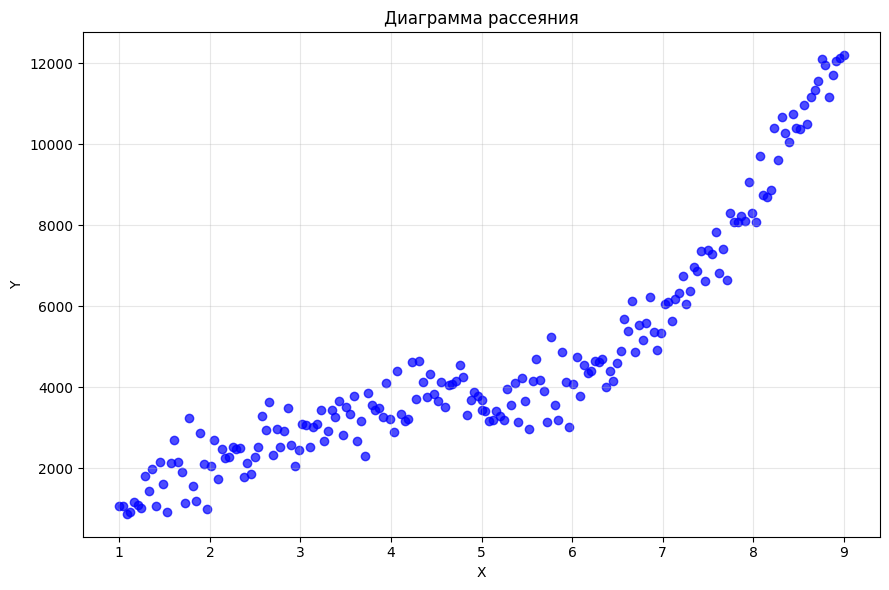

In [61]:
x_column = 'X'
y_column = 'Y'

fig, (ax1) = plt.subplots(1, figsize=(9, 6))

ax1.scatter(df[x_column], df[y_column], alpha=0.7, color='blue')
ax1.set_xlabel(x_column)
ax1.set_ylabel(y_column)
ax1.set_title('Диаграмма рассеяния')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Разбить данные на обучающую и тестовую выборки.

In [62]:
X = df[[x_column]]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Выбрать модель регрессии.

In [63]:
model = LinearRegression()

## 5. Обучить модель регрессии на обучающих данных.

In [64]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. Визуализируем полученный график

In [65]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


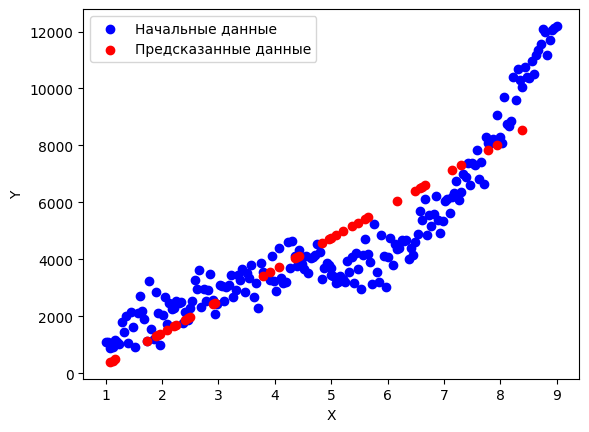

In [66]:
plt.scatter(X, y, color='blue', label='Начальные данные')
plt.scatter(X_test, y_test_pred, color='red', label='Предсказанные данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [67]:
print('R2:', r2_score(y_test, y_test_pred))

R2: 0.8013765670559003


Метрика имеет неплохое значение, для этого набора данных. Рассмотрим другие метрики

In [68]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"MSE: train = {train_mse}, test = {test_mse}")
print(f"MAE: train = {train_mae}, test = {test_mae}")

MSE: train = 1726452.6703531637, test = 878266.8452145274
MAE: train = 1050.7518155844155, test = 773.634556461533


Ошибки оказались очень большими, потому что модель не может в полной мере описать данные